## The Effect of Dropout

Let's see for ourselves how dropout actually affects training. We will use MNIST dataset and a simple convolutional network to do that:

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


We will define `train` function that will take care of all training process, including:
* Defining the neural network architecture with a given dropout rate `d`
* Specifying suitable training parameters (optimizer and loss function)
* Doing the training and collecting the history

We will then run this function for a bunch of different dropout values:

In [3]:
def train(d):
    print(f"Training with dropout = {d}")
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)), 
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(d),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    hist = model.fit(
        x_train, y_train,
        validation_data=(x_test,y_test),
        epochs=5,
        batch_size=64
    )
    
    return hist

res = { d : train(d) for d in [0,0.2,0.5,0.8] }

Training with dropout = 0
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8578 - loss: 0.4734 - val_accuracy: 0.9788 - val_loss: 0.0670
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9793 - loss: 0.0676 - val_accuracy: 0.9836 - val_loss: 0.0499
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.9866 - val_loss: 0.0404
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9878 - val_loss: 0.0362
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9895 - val_loss: 0.0304
Training with dropout = 0.2
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8608 - loss: 0.4766 - val_accuracy: 0.9810 - val_loss: 0.0598
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accuracy: 0.9854 - val_loss: 0.0448
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accu

Now, let's plot validation accuracy graphs for different dropout values to see how fast the training goes:

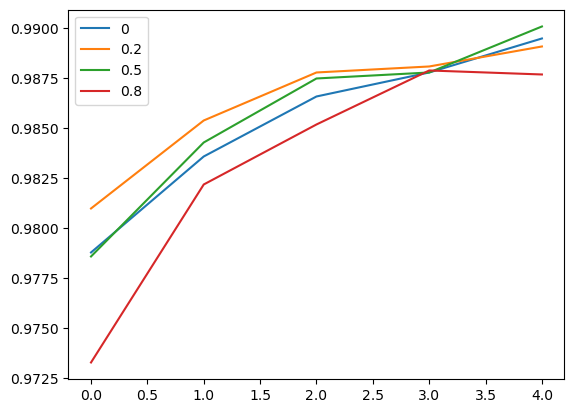

In [5]:
for d,h in res.items():
    plt.plot(h.history['val_accuracy'],label=str(d))
plt.legend()

From this graph, you would probably be able to see the following:
* Dropout values in the 0.2-0.5 range, you will see the fastest training the best overall results
* Without dropout ($d=0$), you are likely to see less stable and slower training process
* High dropout (0.8) makes things worse